# Proyek Analisis Data: Nama dataset
- Nama:Wiefran Varenzo
- Email:lionwiefran88@gmail.com
- Id Dicoding:wiefran_varenzo

## Menentukan Pertanyaan Bisnis

1. Bagaimana persebaran rating dari penjualan produk berdasarkan kategorinya ?
2. Berapa persen pesanan yang datang sesuai atau bahkan lebih cepat dari estimasi
3. Tipe pembayaran apa yang paling banyak dan paling sedikit dipakai?
4. Kota apa dengan sebaran pelanggan terbanyak?
5. Kategori produk apa yang paling diminati yang tidak diminiati oleh pelanggan?
6. Pengaruh rentang ukuran, berat, dan  dari barang yang dikirimkan terhadap biaya pengiriman (shipping/freight value)

## Menyiapkan semua library yang dibuthkan

In [75]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import streamlit as st
from babel.numbers import format_currency
sns.set(style='dark')

# Data Wrangling

## Gathering Data

### Gathering Data customer


Data geolocation_dataset tidak terlalu penting untuk digunakan dan merupakan file yang terlalu besar, sehingga saya tidak menggunakan data tersebut.

In [77]:
#Memuat tabel Customer
customer_df = pd.read_csv("https://raw.githubusercontent.com/WiefranVarenzo/ProyekAnalisisData/main/customers_dataset.csv")
customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


### Gathering Data order_items_dataset

In [78]:
#Memuat tabel order_items_dataset
order_items_dataset = pd.read_csv("https://raw.githubusercontent.com/WiefranVarenzo/ProyekAnalisisData/main/order_items_dataset.csv")
order_items_dataset.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


### Gathering order_payments_dataset

In [79]:
#Memuat tabel order_payments_dataset
order_payments_dataset = pd.read_csv("https://raw.githubusercontent.com/WiefranVarenzo/ProyekAnalisisData/main/order_payments_dataset.csv")
order_payments_dataset.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


### Gathering order_reviews_dataset

In [80]:
#Memuat tabel order_reviews_dataset
order_reviews_dataset = pd.read_csv("https://raw.githubusercontent.com/WiefranVarenzo/ProyekAnalisisData/main/order_reviews_dataset.csv")
order_reviews_dataset.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


### Gathering order_dataset

In [81]:
#Memuat tabel order_dataset
order_datasetorder_dataset = pd.read_csv("https://raw.githubusercontent.com/WiefranVarenzo/ProyekAnalisisData/main/orders_dataset.csv")
order_dataset.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


### Gathering product_dataset

In [82]:
#Memuat tabel produk_dataset
product_dataset = pd.read_csv("https://raw.githubusercontent.com/WiefranVarenzo/ProyekAnalisisData/main/products_dataset.csv")
product_dataset.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


###Gathering seller_dataset

In [83]:
#Memuat tabel seller_dataset
seller_dataset = pd.read_csv("https://raw.githubusercontent.com/WiefranVarenzo/ProyekAnalisisData/main/sellers_dataset.csv")
seller_dataset.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


###Gathering product_category_name_translation

In [84]:
#Memuat tabel product_category_name_translation_dataset
product_category_name_translation = pd.read_csv("https://raw.githubusercontent.com/WiefranVarenzo/ProyekAnalisisData/main/product_category_name_translation.csv")
product_category_name_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


## Assessing Data

### Assessing Data customer_df


In [85]:
#Melihat informasi dari tabel customer
customer_df.info()
#Melihat apakah ada missing value
customer_df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Dapat disimpulkan bahwa tabel customer tidak memiliki adanya missing value, tipe data benar.

In [86]:
#Melihat apakah di table customer_df ada data yang di duplikat
print("Jumlah duplikasi: ", customer_df.duplicated().sum())


Jumlah duplikasi:  0


Terdapat 0 duplikasi pada customer_df.

Bisa dilihat juga bahwa customer_df memiliki duplikat data yang benar.

### Assessing Data order_items_dataset


In [87]:
#Melihat informasi dari tabel order_items_dataset
order_items_dataset.info()
#Melihat apakah ada missing value
order_items_dataset.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Pada order_items_dataset tidak ada missing value, namun shipping_limit_datenya harusnya memiliki tipe data date.

In [88]:
#Melihat apakah di table order_items_dataset ada data yang di duplikat
print("Jumlah duplikasi: ", order_items_dataset.duplicated().sum())
#Melihat apakah di table order_items_dataset ada inaccurate Data
order_items_dataset.describe()

Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


Dari sini bisa kita lihat, bahwa tidak ada missing value, tidak ada duplikat data, dan inaccurate data.

### Assessing Data order_payments_dataset


In [89]:
#Melihat informasi dari tabel order_payments_dataset
order_payments_dataset.info()
#Melihat apakah ada missing value
order_payments_dataset.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [90]:
#Melihat apakah di table order_payments_dataset ada data yang di duplikat
print("Jumlah duplikasi: ", order_payments_dataset.duplicated().sum())
#Melihat apakah di table order_payments_dataset ada inaccurate Data
order_payments_dataset.describe()

Jumlah duplikasi:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


### Assessing Data order_reviews_dataset

In [91]:
#Melihat informasi dari tabel order_reviews_dataset
order_reviews_dataset.info()
#Melihat apakah ada missing value
order_reviews_dataset.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Dari sini kita menemukan bahwa ada missing value dari review_comment_title dan review_comment_message.

Kemudian review_creation_date, dan review_answer_timestamp memiliki tipe data yang salah yaitu harusnya adalah bertipe date.

In [92]:
#Melihat apakah di table order_reviews_dataset ada data yang di duplikat
print("Jumlah duplikasi: ", order_reviews_dataset.duplicated().sum())
#Melihat apakah di table order_reviews_dataset ada inaccurate Data
order_reviews_dataset.describe()

Jumlah duplikasi:  0


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


Karna rating hanya terdiri dari bilangan bulat dari nilai 1 sampai 5 maka dari quartil 2 sampai quartil 3 bernilai 5.

### Assessing Data order_dataset


In [93]:
#Melihat informasi dari tabel order_dataset
order_dataset.info()
#Melihat apakah ada missing value
order_dataset.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

dari sini kita bisa melihat bahwa order_approved_at, order_delivered_carrier_date, order_delivered_customer_date memiliki missing value. Lalu terdapat tipe data yang salah pada: order_approved_at,order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date

In [94]:
#Melihat apakah di table order_dataset ada data yang di duplikat
print("Jumlah duplikasi: ", order_dataset.duplicated().sum())


Jumlah duplikasi:  0


Dari sini kita bisa melihat bahwa tidak ada missing value pada order_dataset

### Assessing Data product_dataset


In [95]:
#Melihat informasi dari tabel product_dataset
product_dataset.info()
#Melihat apakah ada missing value
product_dataset.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [96]:
#Melihat apakah di table product_dataset ada data yang di duplikat
print("Jumlah duplikasi: ", product_dataset.duplicated().sum())
#Melihat apakah di table product_dataset ada inaccurate Data
product_dataset.describe()

Jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


Dari hasil ini kita telah mengetahui bahwa tabel Product_dataset terdapat missing value pada kolom product_category_name, product_name_lenght,product_description_lenght

### Assessing Data seller_dataset


In [97]:
#Melihat informasi dari tabel seller_dataset
seller_dataset.info()
#Melihat apakah ada missing value
seller_dataset.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [98]:
#Melihat apakah di table seller_dataset ada data yang di duplikat
print("Jumlah duplikasi: ", seller_dataset.duplicated().sum())

Jumlah duplikasi:  0


Dari sini kita tahu bahwa bahwa seller_dataset tidak memiliki missing value, inaccurate data, dan data duplikat

### Assessing Data product_category_name_translation


In [99]:
#Melihat informasi dari tabel product_category_name_translation_dataset
product_category_name_translation.info()
#Melihat apakah ada missing value
product_category_name_translation.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


product_category_name            0
product_category_name_english    0
dtype: int64

In [100]:
#Melihat apakah di table seller_dataset ada data yang di duplikat
print("Jumlah duplikasi: ", product_category_name_translation.duplicated().sum())

Jumlah duplikasi:  0


##Cleaning Data

product_category_name_translation_dataset tidak memiliki missing value, duplikat data, dan inaccurate data

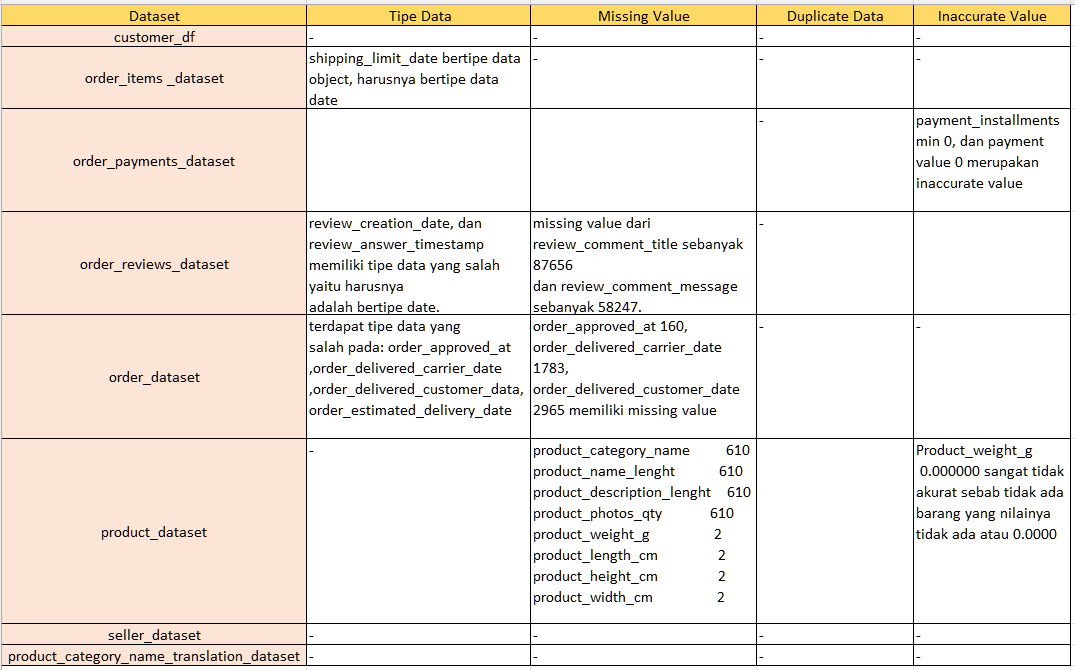

### Cleaning Data order_items_dataset

#### Tipe Data

In [101]:
#Melakukan Cleaning terhadap order_items_dataset
datetime_columns = ["shipping_limit_date"]

for column in datetime_columns:
  order_items_dataset[column] = pd.to_datetime(order_items_dataset[column])

In [102]:
#Memastikan order_items_dataset sudah benar
order_items_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


Semua datatype sudah benar

### Cleaning Data order_payments_dataset

####Inaccurate Value


Karena payment_installments tidak boleh sama dengan 0 dan payment_value juga tidak boleh sama dengan 0 maka kita akan melakukan data cleaning pada mereka.

In [103]:
#Melihat data mana saja yang memiliki payment_installments 0
order_payments_dataset[order_payments_dataset.payment_installments == order_payments_dataset.payment_installments.min()]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
46982,744bade1fcf9ff3f31d860ace076d422,2,credit_card,0,58.69
79014,1a57108394169c0b47d8f876acc9ba2d,2,credit_card,0,129.94


In [104]:
#Karena cuman 2 data saja, maka kita akan melakukan dropping saja
# Menghapus baris dengan payment_installments yang sama dengan 0
order_payments_dataset.drop(order_payments_dataset[order_payments_dataset['payment_installments'] == 0].index, inplace=True)


In [105]:
#Melihat data apakah masih ada yang memiliki payment_installments 0
order_payments_dataset[order_payments_dataset.payment_installments == order_payments_dataset.payment_installments.min()]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
6,771ee386b001f06208a7419e4fc1bbd7,1,credit_card,1,81.16
9,0573b5e23cbd798006520e1d5b4c6714,1,boleto,1,51.95
11,2480f727e869fdeb397244a21b721b67,1,credit_card,1,141.90
...,...,...,...,...,...
103874,d41f1036712e18ee525939d08b7a1c98,1,credit_card,1,3.57
103877,3531718b24dfd5022fb0d101e10e33b9,1,credit_card,1,194.11
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77


In [106]:
#Melihat data mana saja yang memiliki payment_value yang 0
order_payments_dataset[order_payments_dataset.payment_value == order_payments_dataset.payment_value.min()]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
19922,8bcbe01d44d147f901cd3192671144db,4,voucher,1,0.0
36822,fa65dad1b0e818e3ccc5cb0e39231352,14,voucher,1,0.0
43744,6ccb433e00daae1283ccc956189c82ae,4,voucher,1,0.0
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.0
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.0
62674,45ed6e85398a87c253db47c2d9f48216,3,voucher,1,0.0
77885,fa65dad1b0e818e3ccc5cb0e39231352,13,voucher,1,0.0
94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.0
100766,b23878b3e8eb4d25a158f57d96331b18,4,voucher,1,0.0


Karna Payment value yang menggunakan voucher itu berkemungkinan untuk payment_valuenya 0.0, sedangkan yang not_defined itu kita tidak tahu apakah bisa 0.0 atau tidak, maka kita akan menghapus data yang memiliki payment_type *not_defined* dan payment_valuenya=0

In [107]:
#Saya akan menghapus data dengan payment_type not_defined dan payment valuenya 0
order_payments_dataset.drop(order_payments_dataset[(order_payments_dataset['payment_value'] == 0) & (order_payments_dataset['payment_type'] == 'not_defined')].index, inplace=True)


In [108]:
#Melihat data mana saja yang memiliki payment_value yang 0
order_payments_dataset[order_payments_dataset.payment_value == order_payments_dataset.payment_value.min()]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
19922,8bcbe01d44d147f901cd3192671144db,4,voucher,1,0.0
36822,fa65dad1b0e818e3ccc5cb0e39231352,14,voucher,1,0.0
43744,6ccb433e00daae1283ccc956189c82ae,4,voucher,1,0.0
62674,45ed6e85398a87c253db47c2d9f48216,3,voucher,1,0.0
77885,fa65dad1b0e818e3ccc5cb0e39231352,13,voucher,1,0.0
100766,b23878b3e8eb4d25a158f57d96331b18,4,voucher,1,0.0


### Cleaning Data order_reviews_datase


#### Tipe data

In [109]:
#Memperbaiki tipe data order_reviews_dataset
datetime_columns = ["review_creation_date", "review_answer_timestamp"]

for column in datetime_columns:
  order_reviews_dataset[column] = pd.to_datetime(order_reviews_dataset[column])

In [110]:
#Memastikan order_reviews_dataset sudah benar
order_reviews_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


Semua datatype sudah benar

####Missing value

In [111]:
#melihat data mana saja yang terdapat missing value
order_reviews_dataset[order_reviews_dataset.review_comment_title.isna()]
order_reviews_dataset[order_reviews_dataset.review_comment_message.isna()]
#Karena review_comment_message dan review_comment_title hanya memiliki informasi rating saja(tidak terlalu banyak data yang diberikan), oleh karena itu saya akan melakukan dropping/penghapusan data

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16,2017-07-18 19:30:34
...,...,...,...,...,...,...,...
99217,c6b270c61f67c9f7cb07d84ea8aeaf8b,48f7ee67313eda32bfcf5b9c1dd9522d,5,NaN,NaN,2017-12-13,2017-12-14 11:09:36
99218,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,NaN,NaN,2018-04-27,2018-04-30 01:18:57
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09,2017-12-11 20:06:42


In [112]:
#menghapus data review_comment_title yang missing value
order_reviews_dataset.dropna(axis=0, inplace=True)
order_reviews_dataset.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

Tidak ada Missing value lagi pada data review_comment_title

### Cleaning Data order_set

#### Tipe data

In [113]:
#Melakukan perbaikan pada tipe data order_set
datetime_columns = ["order_approved_at","order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns:
  order_dataset[column] = pd.to_datetime(order_dataset[column])

In [114]:
#Melihat tipe data yang sekarang
order_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  object        
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](4), object(4)
memory usage: 6.1+ MB


Tipe data order_dataset sudah benar

#### Missing Value

In [115]:
#Menghapus missing value pada order_dataset
order_dataset.dropna(axis=0, inplace=True)

In [116]:
#melihat data mana saja yang terdapat missing value
order_dataset.info()


<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  object        
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](4), object(4)
memory usage: 6.6+ MB


Sudah tidak ada data pada Missing Value di order_dataset

### Cleaning Data product_dataset

#### Missing Value

In [117]:
#Menghapus missing value pada product_dataset
product_dataset.dropna(axis=0, inplace=True)
product_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32340 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32340 non-null  object 
 1   product_category_name       32340 non-null  object 
 2   product_name_lenght         32340 non-null  float64
 3   product_description_lenght  32340 non-null  float64
 4   product_photos_qty          32340 non-null  float64
 5   product_weight_g            32340 non-null  float64
 6   product_length_cm           32340 non-null  float64
 7   product_height_cm           32340 non-null  float64
 8   product_width_cm            32340 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


tidak ada lagi missing value dari product_dataset

#### Inaccurate Data

In [118]:
#melihat data product_weight_g yang memiliki nilai 0
product_dataset[product_dataset.product_weight_g == product_dataset.product_weight_g.min()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
9769,81781c0fed9fe1ad6e8c81fca1e1cb08,cama_mesa_banho,51.0,529.0,1.0,0.0,30.0,25.0,30.0
13683,8038040ee2a71048d4bdbbdc985b69ab,cama_mesa_banho,48.0,528.0,1.0,0.0,30.0,25.0,30.0
14997,36ba42dd187055e1fbe943b2d11430ca,cama_mesa_banho,53.0,528.0,1.0,0.0,30.0,25.0,30.0
32079,e673e90efa65a5409ff4196c038bb5af,cama_mesa_banho,53.0,528.0,1.0,0.0,30.0,25.0,30.0


In [119]:
product_dataset.product_weight_g.describe()

count    32340.000000
mean      2276.956586
std       4279.291845
min          0.000000
25%        300.000000
50%        700.000000
75%       1900.000000
max      40425.000000
Name: product_weight_g, dtype: float64

In [120]:
#Karena banyak informasi terdapat dari baris yang memiliki missing value, Saya akan menggunakan nilai median sebagai pengganti (imputation)
product_dataset.loc[product_dataset['product_weight_g'] == 0, 'product_weight_g'] = product_dataset['product_weight_g'].median()



In [121]:
#mengecek data product_weight_g yang memiliki nilai 0 ada atau tidak
product_dataset[product_dataset['product_weight_g'] == 0]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm


Sudah tidak ada product_dataset di kolom product_weight_g yang bernilai 0

# Exploratory Data Analysis (EDA)

### Exploratory Data Analysis customer_df

In [122]:
city_customer_counts = customer_df['customer_city'].value_counts().reset_index()
city_customer_counts.columns = ['customer_city', 'customer_count']

# Mengurutkan berdasarkan jumlah customer secara descending
sorted_city_customers = city_customer_counts.sort_values(by='customer_count', ascending=False)

print(sorted_city_customers)

          customer_city  customer_count
0             sao paulo           15540
1        rio de janeiro            6882
2        belo horizonte            2773
3              brasilia            2131
4              curitiba            1521
...                 ...             ...
3362  palmares paulista               1
3363     pires ferreira               1
3364      vicente dutra               1
3365        alagoa nova               1
4118  eugenio de castro               1

[4119 rows x 2 columns]


In [123]:
#Melihat data mana saja yang memiliki payment_installments 0
city_customer_counts[city_customer_counts.customer_count == city_customer_counts.customer_count.min()]

,customer_city,customer_count
2975,virginia,1
2976,florania,1
2977,embauba,1
2978,general maynard,1
2979,duas barras,1
...,...,...
4114,bequimao,1
4115,andarai,1
4116,vargem grande,1
4117,curvelandia,1


In [124]:
city_customer_counts[city_customer_counts.customer_count == city_customer_counts.customer_count.max()]

,customer_city,customer_count
0,sao paulo,15540


Dari tabel customer, yang bisa kita ambil informasi dari tabel ini saja, adalah darimana saja customer ini berada. Bagaiamana persebarannyya dan darimana saja, serta paling banyak dan paling sedikit dari kota mana.

### Exploratory Data Analysist order_items_dataset dan product_dataset

In [125]:
merged_items_product_df = order_items_dataset.merge(product_dataset, on='product_id', how='inner')

In [126]:
merged_items_product_df.describe()

,order_item_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,111046.000000,111046,111046.000000,111046.000000,111046.000000,111046.000000,111046.000000,111046.000000,111046.000000,111046.000000,111046.000000
mean,1.198215,2018-01-08 10:09:32.626181888,120.762337,20.025149,48.775877,787.866335,2.209706,2100.030087,30.211003,16.626362,23.041956
min,1.000000,2016-09-19 00:15:34,0.850000,0.000000,5.000000,4.000000,1.000000,2.000000,7.000000,2.000000,6.000000
25%,1.000000,2017-09-21 04:50:18.750000128,39.900000,13.080000,42.000000,348.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,1.000000,2018-01-28 23:19:02,74.990000,16.300000,52.000000,603.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,1.000000,2018-05-11 00:26:54.249999872,134.900000,21.180000,57.000000,987.000000,3.000000,1800.000000,38.000000,20.000000,30.000000
max,21.000000,2020-04-09 22:35:08,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000
std,0.706875,NaN,183.339790,15.840629,10.025570,652.138503,1.721445,3754.761721,16.189352,13.467460,11.716659


In [127]:
#Melihat apakah semakin besar volume benda (dari length, height, width) apakah freight value semakin besar?
#Untuk melakukan itu kita harus sort volume benda tersebar hingga terkecil lalu ascendingkan dan bandingkan dengan volume terkecil apakah freight value berpengaruh?
merged_items_product_df["volumeBarang"] = merged_items_product_df["product_length_cm"]*merged_items_product_df["product_height_cm"]*merged_items_product_df["product_width_cm"]
sorted = merged_items_product_df.sort_values(by="volumeBarang", ascending=True)
selected_columns=sorted[["volumeBarang","freight_value"]]
print(selected_columns.sort_values(by="volumeBarang", ascending=False))

        volumeBarang  freight_value
100554      296208.0         339.59
67441       294000.0         119.29
71810       294000.0         163.52
71809       294000.0         163.52
97328       294000.0         120.19
...              ...            ...
38709          352.0          15.23
38710          352.0          15.23
64629          352.0           8.72
4536           288.0          20.85
110039         168.0          27.05

[111046 rows x 2 columns]


In [128]:
correlation = selected_columns["volumeBarang"].corr(selected_columns["freight_value"])
print("Korelasi antara Volume Barang dan Freight Value:", correlation)

Korelasi antara Volume Barang dan Freight Value: 0.5876008947927364


Nilai korelasi 0.5876008947927341 menunjukkan bahwa ada hubungan yang cukup kuat antara Volume Barang dan Freight Value.

### Exploratory Data Analyst order_payments_dataset

In [129]:
payment_counts = order_payments_dataset['payment_type'].value_counts().reset_index()
payment_counts.columns = ['payment type', 'Jumlah']

# Mengurutkan berdasarkan jumlah customer secara descending
sorted_payments_customers = payment_counts.sort_values(by='Jumlah', ascending=False)

print(sorted_payments_customers)

  payment type  Jumlah
0  credit_card   76793
1       boleto   19784
2      voucher    5775
3   debit_card    1529


### Exploratory Data Analysist order_review_dataset, order_items_dataset, product_dataset

In [130]:
reviews_counts = order_reviews_dataset['review_score'].value_counts().reset_index()
reviews_counts.columns = ['review_score', 'Jumlah']

# Mengurutkan berdasarkan jumlah customer secara descending
sorted_reviews_customers = reviews_counts.sort_values(by='Jumlah', ascending=False)

print(sorted_reviews_customers)

   review_score  Jumlah
0             5    5422
1             1    1789
2             4    1433
3             3     737
4             2     458


Yang paling banyak adalah rating 5 dengan jumlah 5422

In [131]:
merged_review_df = order_reviews_dataset.merge(merged_items_product_df, on='order_id', how='inner')
merged_review_df = merged_review_df.merge(product_category_name_translation, on='product_category_name', how='inner' )

In [132]:
merged_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11459 entries, 0 to 11458
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   review_id                      11459 non-null  object        
 1   order_id                       11459 non-null  object        
 2   review_score                   11459 non-null  int64         
 3   review_comment_title           11459 non-null  object        
 4   review_comment_message         11459 non-null  object        
 5   review_creation_date           11459 non-null  datetime64[ns]
 6   review_answer_timestamp        11459 non-null  datetime64[ns]
 7   order_item_id                  11459 non-null  int64         
 8   product_id                     11459 non-null  object        
 9   seller_id                      11459 non-null  object        
 10  shipping_limit_date            11459 non-null  datetime64[ns]
 11  price          

In [133]:
merged_data = merged_review_df.merge(product_dataset, on='product_id', how='inner')
grouped_data = merged_data.groupby(['product_category_name_english', 'review_score']).size().reset_index(name='Jumlah')
print(grouped_data.sort_values(by='Jumlah', ascending=False))


    product_category_name_english  review_score  Jumlah
161                 health_beauty             5     615
37                 bed_bath_table             5     601
273                 watches_gifts             5     460
188                    housewares             5     443
252                sports_leisure             5     416
..                            ...           ...     ...
47                books_technical             3       1
97            diapers_and_hygiene             1       1
121       fashion_underwear_beach             1       1
223                party_supplies             4       1
50              cds_dvds_musicals             5       1

[274 rows x 3 columns]


Bisa kita lihat bahwa health_beauty adalah product dengan jumlah review dengan bintang 5 terbanyak.

### Exploratory Data Analysist order_dataset, order_items_dataset, product_dataset


In [134]:
merged_order_df = order_dataset.merge(merged_items_product_df, on='order_id', how='inner')
merged_order_df = merged_order_df.merge(product_category_name_translation, on='product_category_name', how='inner' )
merged_order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108621 entries, 0 to 108620
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       108621 non-null  object        
 1   customer_id                    108621 non-null  object        
 2   order_status                   108621 non-null  object        
 3   order_purchase_timestamp       108621 non-null  object        
 4   order_approved_at              108621 non-null  datetime64[ns]
 5   order_delivered_carrier_date   108621 non-null  datetime64[ns]
 6   order_delivered_customer_date  108621 non-null  datetime64[ns]
 7   order_estimated_delivery_date  108621 non-null  datetime64[ns]
 8   order_item_id                  108621 non-null  int64         
 9   product_id                     108621 non-null  object        
 10  seller_id                      108621 non-null  object        
 11  

In [135]:
grouped_order_dataset = merged_data.groupby(['product_category_name_english']).size().reset_index(name='Jumlah')
print(grouped_order_dataset.sort_values(by='Jumlah', ascending=False))

   product_category_name_english  Jumlah
7                 bed_bath_table    1178
40                 health_beauty    1097
65                 watches_gifts     927
46                    housewares     911
60                sports_leisure     734
..                           ...     ...
25                  dvds_blu_ray       3
11             cds_dvds_musicals       1
62        tablets_printing_image       1
28     fashion_childrens_clothes       1
33                       flowers       1

[66 rows x 2 columns]


In [136]:
# Menemukan kategori produk yang paling diminati (maksimum jumlah pesanan)
most_popular = grouped_order_dataset[grouped_order_dataset['Jumlah'] == grouped_order_dataset['Jumlah'].max()]

# Menemukan kategori produk yang paling tidak diminati (minimum jumlah pesanan)
least_popular = grouped_order_dataset[grouped_order_dataset['Jumlah'] == grouped_order_dataset['Jumlah'].min()]

print("Kategori Produk Paling Diminati:")
print(most_popular)

print("Kategori Produk Paling Tidak Diminati:")
print(least_popular)

Kategori Produk Paling Diminati:
  product_category_name_english  Jumlah
7                bed_bath_table    1178
Kategori Produk Paling Tidak Diminati:
   product_category_name_english  Jumlah
11             cds_dvds_musicals       1
28     fashion_childrens_clothes       1
33                       flowers       1
62        tablets_printing_image       1


Bisa kita lihat bahwa bed_bath_table dan health_beauty merupakan kategori dengan jumalh

In [137]:
delivery_time = order_dataset["order_delivered_customer_date"] - order_dataset["order_delivered_carrier_date"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds() / 86400)  # Menghitung dalam hari
order_dataset["delivery_time"] = delivery_time

def is_on_time(row):
    return row["delivery_time"] <= (row["order_estimated_delivery_date"] - row["order_delivered_carrier_date"]).days

order_dataset["on_time"] = order_dataset.apply(is_on_time, axis=1)

#Variabel yang menyatakan berapa banyak yang tepat waktu dan mana pesanan yang terlambat
tepat_waktu = order_dataset["on_time"].sum()
terlambat = len(order_dataset) - tepat_waktu

print("Banyaknya orderan yang tepat waktu adalah", tepat_waktu)
print("Banyaknya orderan yang terlambat adalah", terlambat)


Banyaknya orderan yang tepat waktu adalah 87742
Banyaknya orderan yang terlambat adalah 8719


# Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana persebaran rating dari penjualan produk berdasarkan kategorinya?

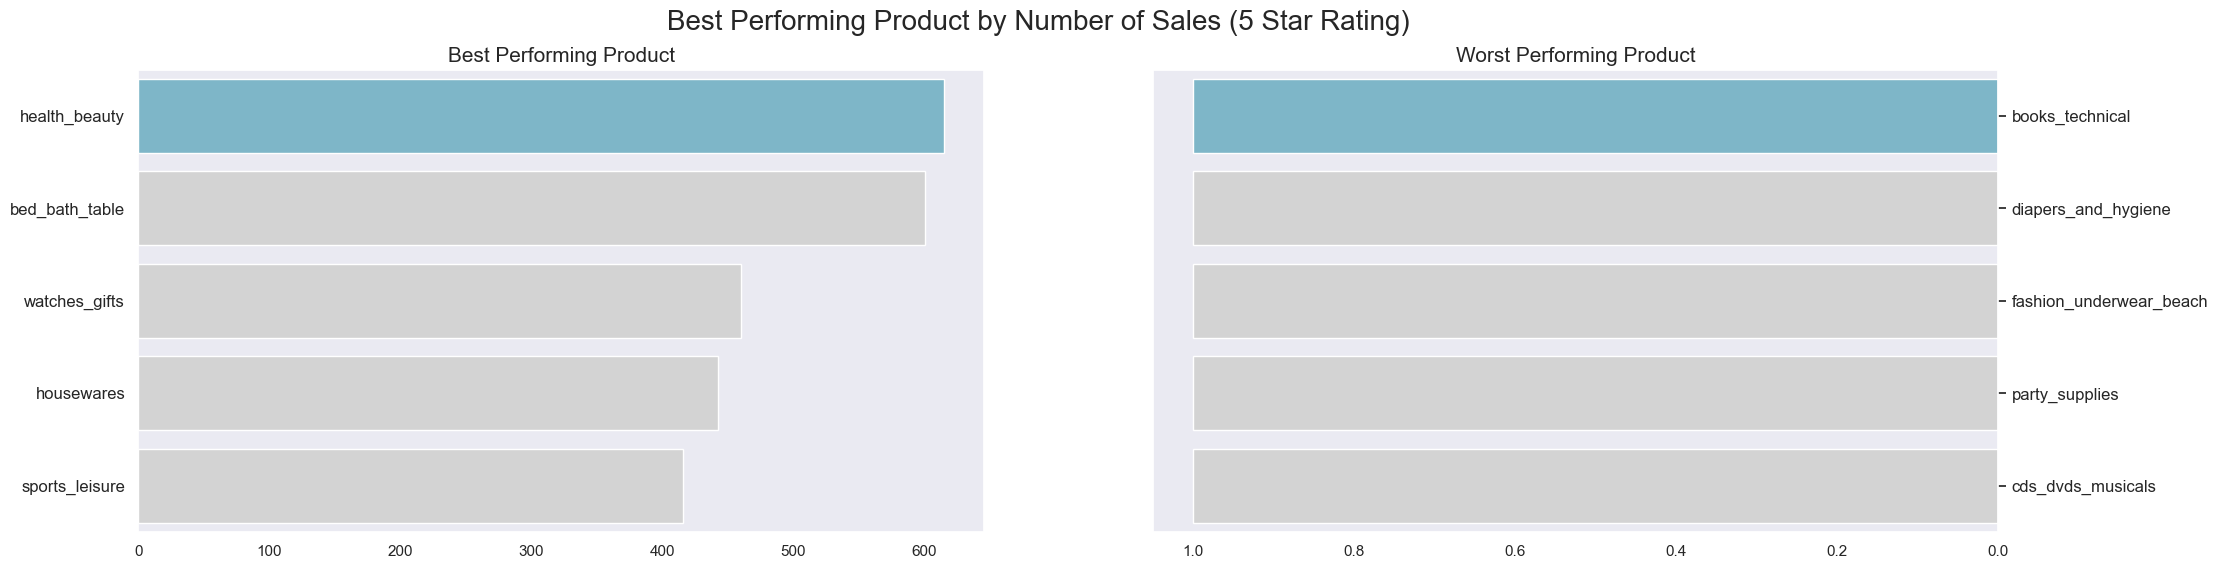

In [138]:
# Sort the data first
grouped_data = grouped_data.sort_values(by="Jumlah", ascending=False)

# Take the top and worst 5 categories
top_5_categories = grouped_data.head(5)
worst_5_categories = grouped_data.tail(5)


# Create the plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 6))
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

# Bar plot for the top categories
sns.barplot(x="Jumlah", y="product_category_name_english", data=top_5_categories, palette=colors, ax=ax1)
ax1.set_ylabel(None)
ax1.set_xlabel(None)
ax1.set_title("Best Performing Product", loc="center", fontsize=15)
ax1.tick_params(axis='y', labelsize=12)

# Bar plot for the worst categories
sns.barplot(x="Jumlah", y="product_category_name_english", data=worst_5_categories, palette=colors, ax=ax2)
ax2.set_ylabel(None)
ax2.set_xlabel(None)
ax2.invert_xaxis()
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()
ax2.set_title("Worst Performing Product", loc="center", fontsize=15)
ax2.tick_params(axis='y', labelsize=12)

plt.suptitle("Best Performing Product by Number of Sales (5 Star Rating)", fontsize=20)
plt.show()


### Pertanyaan 2:Berapa persen pesanan yang datang sesuai atau bahkan lebih cepat dari estimasi

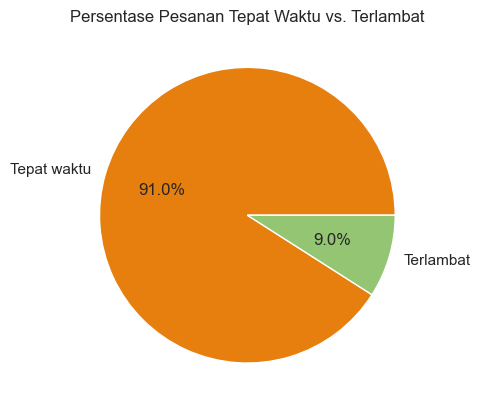

In [139]:
plt.title("Persentase Pesanan Tepat Waktu vs. Terlambat")
data_label = ("Tepat waktu", "Terlambat")
votes = (tepat_waktu, terlambat)
colors = ('#E67F0D', '#93C572')
explode = (0, 0)

plt.pie(
    x=votes,
    labels=data_label,
    autopct='%1.1f%%',
    colors=colors,
    explode=explode
)
plt.show()

### Pertanyaan 3: Tipe pembayaran apa yang paling banyak dan paling sedikit dipakai? Sudah

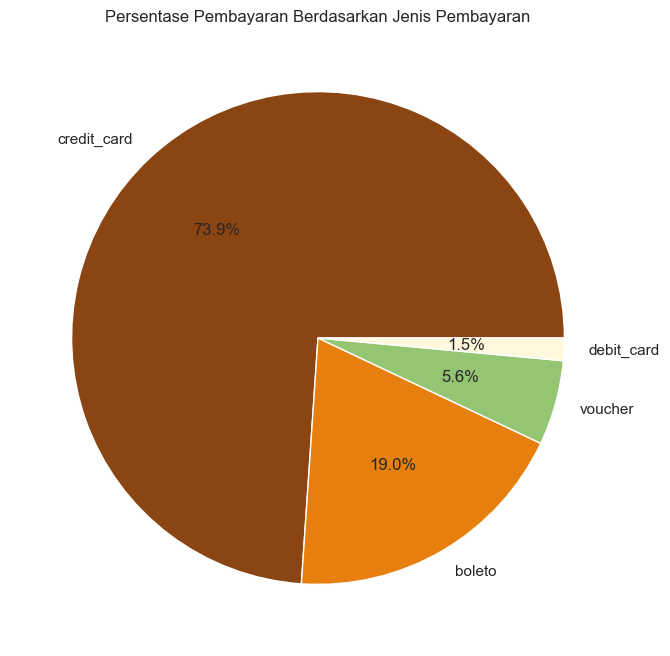

In [140]:
# Data
data_label = payment_counts['payment type']
votes = payment_counts['Jumlah']
colors = ('#8B4513','#E67F0D', '#93C572', '#FFF8DC')
explode = (0, 0,0,0)

# Buat pie chart
plt.figure(figsize=(8, 8))
plt.pie(votes, labels=data_label, autopct='%1.1f%%', colors=colors)

# Tambahkan judul
plt.title("Persentase Pembayaran Berdasarkan Jenis Pembayaran")

# Tampilkan pie chart
plt.show()

### Pertanyaan 4: Kota apa dengan sebaran pelanggan terbanyak?

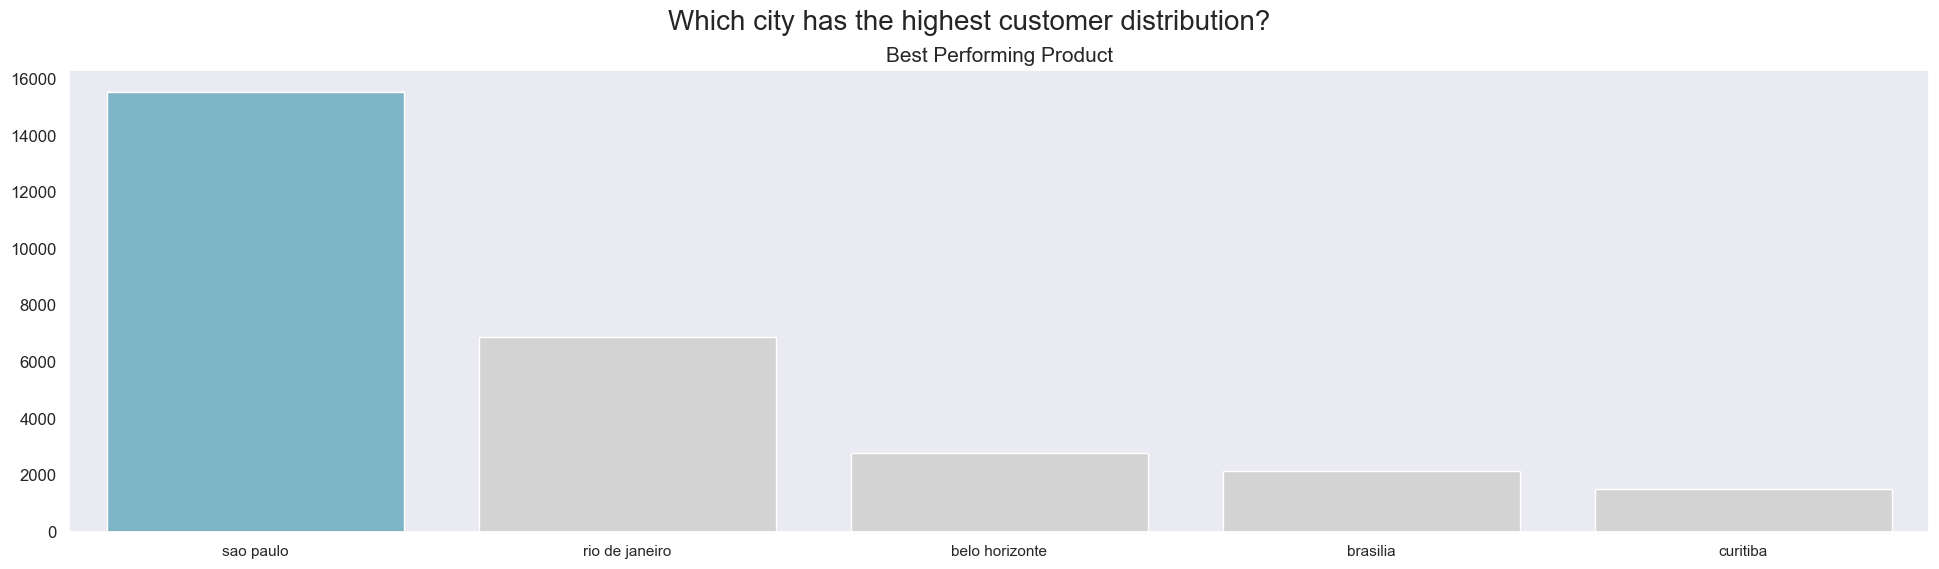

In [141]:
sorted_city_customers = sorted_city_customers.sort_values(by="customer_count", ascending=False)

# Ambil 5 kategori teratas
top_5_customers_location = sorted_city_customers.head(5)

# Buat plot
fig, ax = plt.subplots(figsize=(24, 6))
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(x="customer_city", y="customer_count", data=top_5_customers_location, palette=colors, ax=ax)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_title("Best Performing Product", loc="center", fontsize=15)
ax.tick_params(axis='y', labelsize=12)

plt.suptitle("Which city has the highest customer distribution?", fontsize=20)
plt.show()


### Pertanyaan 5: Kategori apa yang paling diminati dan tidak diminati

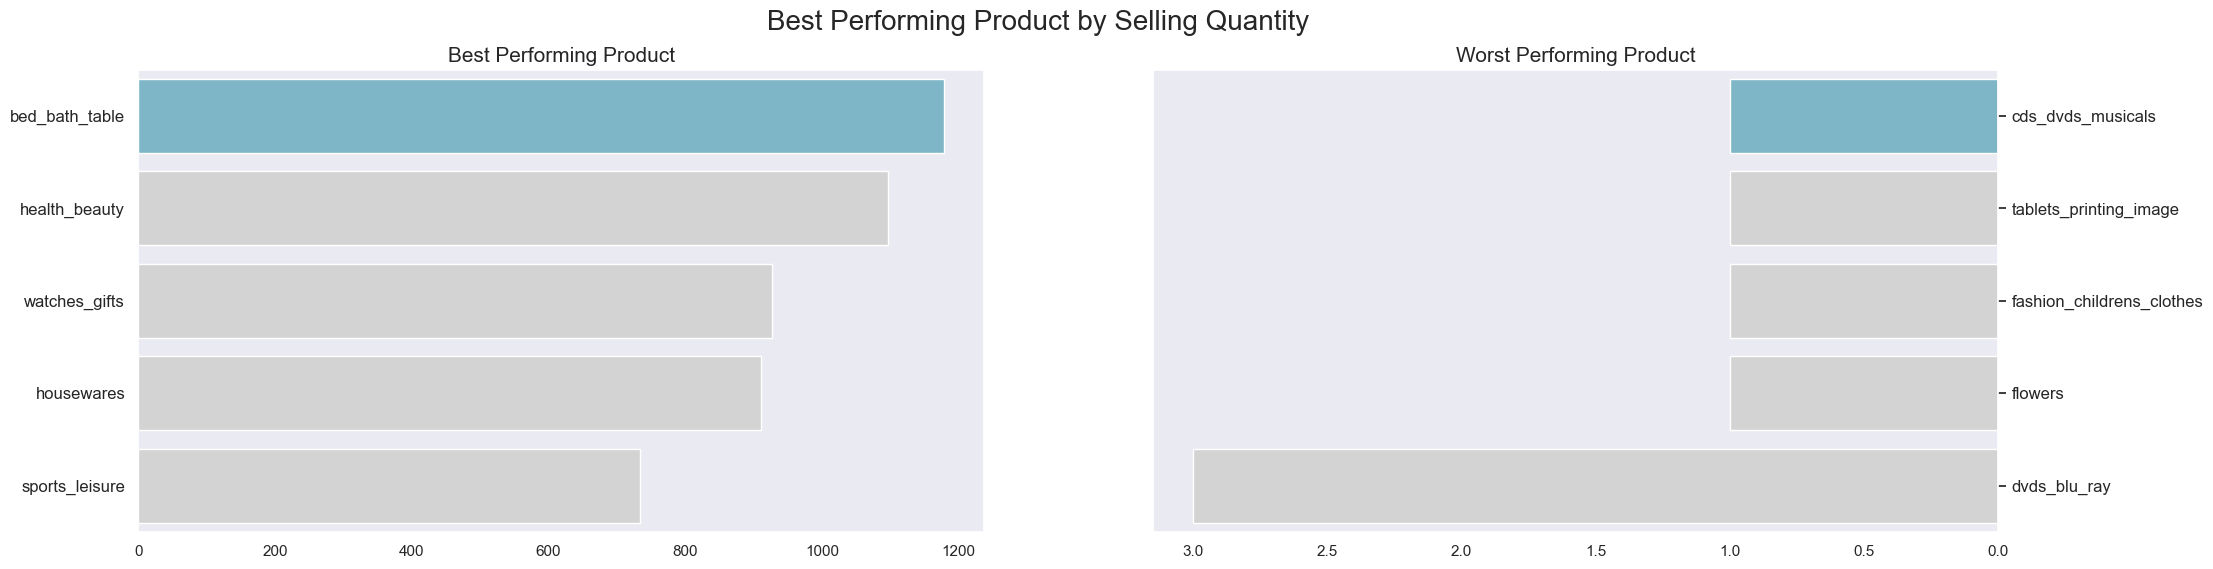

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns

grouped_order_data = grouped_order_dataset.sort_values(by="Jumlah", ascending=False)

# Ambil 5 kategori teratas
top_5_order_categories = grouped_order_data.head(5)
lowest_5_order_categories = grouped_order_data.tail(5)


# Buat plot
fig, axes = plt.subplots(1, 2, figsize=(24, 6))

# Plot terbaik
sns.barplot(x="Jumlah", y="product_category_name_english", data=top_5_order_categories, palette=colors, ax=axes[0])
axes[0].set_ylabel(None)
axes[0].set_xlabel(None)
axes[0].set_title("Best Performing Product", loc="center", fontsize=15)
axes[0].tick_params(axis='y', labelsize=12)

# Plot terburuk
sns.barplot(x="Jumlah", y="product_category_name_english", data=lowest_5_order_categories.sort_values(by="Jumlah", ascending=True).head(5), palette=colors, ax=axes[1])
axes[1].set_ylabel(None)
axes[1].set_xlabel(None)
axes[1].invert_xaxis()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set_title("Worst Performing Product", loc="center", fontsize=15)
axes[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Best Performing Product by Selling Quantity", fontsize=20)
plt.show()


### Pertanyaan 6:Pengaruh rentang ukuran, berat, dan  dari barang yang dikirimkan terhadap biaya pengiriman (shipping/freight value)

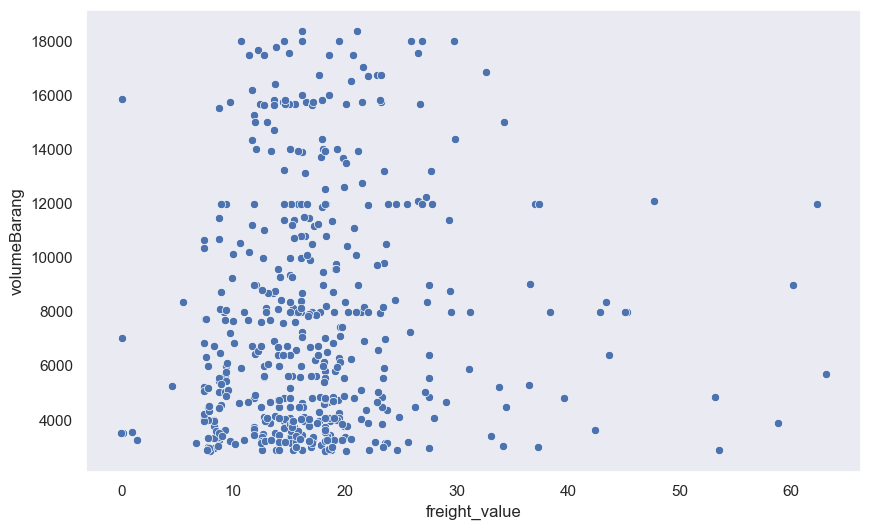

In [143]:

# Contoh data (gantilah ini dengan data sebenarnya)
data = selected_columns["volumeBarang"]

# Hitung Q1 dan Q3
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)

# Filter data yang berada di antara Q1 dan Q3
filtered_data = selected_columns[(data >= q1) & (data <= q3)].sample(n=500)  # Ubah jumlah sampel sesuai kebutuhan

# Buat scatterplot dengan data yang telah difilter
plt.figure(figsize=(10, 6))  # Sesuaikan ukuran gambar sesuai kebutuhan
sns.scatterplot(data=filtered_data, x="freight_value", y="volumeBarang")
plt.show()


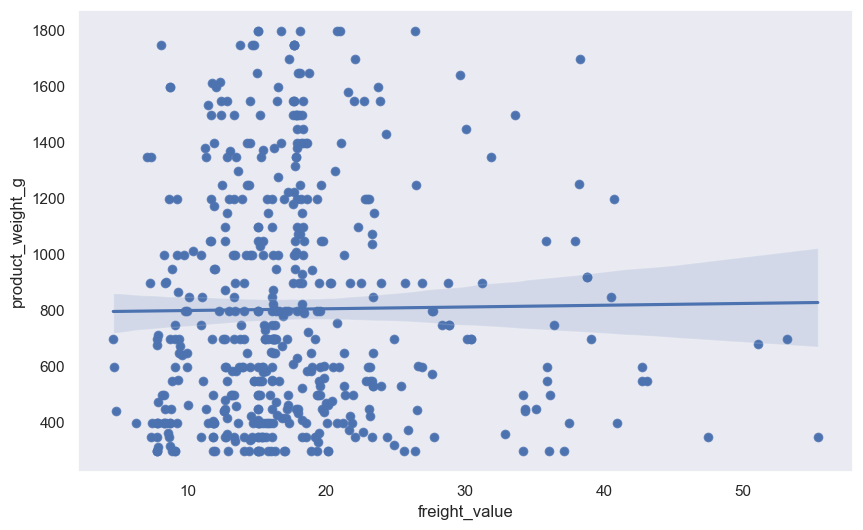

<Figure size 640x480 with 0 Axes>

In [146]:
# Contoh data (gantilah ini dengan data sebenarnya)
data = merged_order_df["product_weight_g"]  # Ganti nama kolom sesuai yang ada dalam DataFrame Anda

# Hitung Q1 dan Q3
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)

# Filter data yang berada di antara Q1 dan Q3
filtered_berat_data = merged_order_df[(data >= q1) & (data <= q3)].sample(n=500)  # Ubah jumlah sampel sesuai kebutuhan

# Buat scatterplot dengan data yang telah difilter
plt.figure(figsize=(10, 6))  # Sesuaikan ukuran gambar sesuai kebutuhan
sns.scatterplot(data=filtered_berat_data, x="freight_value", y="product_weight_g")
sns.regplot(data=filtered_berat_data,x="freight_value",  y="product_weight_g")
plt.show()
plt.savefig('visualisasi.png')


## Conclusion

- Conclution Pertanyaan 1:
Dari persebaran rating dari penjualan produk berdasarkan kategorinya, maka bisa kita lihat bahwa health_beauty dan bed_bath_table merupakan yang paling banyak mendapat rating 5 paling banyak, yaitu sekitar lebih dari 600 orderan.

- conclution pertanyaan 2:
Terdapat 91% yang sesuai dengan jadwal sedangkan 9% lainnya terlambat, hal ini merupakan hal baik sebab lebih dari 90% pesanan sesuai dengan jadwal, namun hal ini bisa ditingkatkan pula.

- conclution pertanyaan 3:
Tipe pembayaran paling banyak dipakai adalah credit_card yaitu sebanyak 73,9% dan setelah itu ada boleto sebanyak 19%, kemudian 5.6% untuk voucher, lalu ada sebanyak 1.5% yang menggunakan kartu debit

- conclution pertanyaan 4:
Kota yang paling banyak memiliki persebaran data adalah saopaolo dengan sebanyak lebih dari 15000 orderan yang berada di saopolo, diikuti dengan rio de jeinaro sebanyak 6000 orderan, belo horizonte sekitaran lebih dari 2000 oderan.

- conluction pertanyaan 5:
Kateogri yang paling diminati adalah bed_bath_table sebanyak lebih dari 1100 orderan, kemudian diikuti dengan health_beauty.

- conclution pertanyaan 6:
Dari korelasi yang bisa saya lihat, volume barang tidak terlalu memberikan korelasi dari data yang ada. Lalu untuk berat, memberikan korelasi yang tidak terlalu kuat juga.


In [ ]:
# Contoh data pelanggan dengan kolom 'customer_id', 'purchase_date', dan 'purchase_amount'
data = {
    'customer_id': customer_df['customer_id'],
    'purchase_date': order_dataset['order_purchase_timestamp'],
    'purchase_amount': [1]
}

df = pd.DataFrame(data)
df['purchase_date'] = pd.to_datetime(df['purchase_date'])
today = pd.to_datetime('2023-05-31')

# Menghitung Recency, Frequency, dan Monetary
recency = today - df.groupby('customer_id')['purchase_date'].max()
frequency = df.groupby('customer_id').size()
monetary = df.groupby('customer_id')['purchase_amount'].sum()

rfm_df = pd.DataFrame({'Recency': recency, 'Frequency': frequency, 'Monetary': monetary})

# Tampilkan dataframe RFM
print(rfm_df)